In [168]:
import base64
import io
import json
import re
from nagisa import Tagger
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont

In [169]:
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
width = 1280
height = 720

In [170]:
id_ = 43737
with open(f"data/aozora-{id_}.txt", encoding="utf-8") as f:
    text = f.read().replace("\u3000", "").replace("\n", "")

In [171]:
tagger = Tagger()
words = tagger.tagging(text).words

In [172]:
hiragana_re = re.compile('[\u3041-\u309F]+')
filtered_words = list(filter(lambda x: len(x) > 3 or not hiragana_re.fullmatch(x) , words))
len(words), len(filtered_words)

(25426, 9866)

In [203]:
wc = WordCloud(font_path=font_path, width=width, height=height, max_words=1000, min_font_size=2, max_font_size=50)

1000


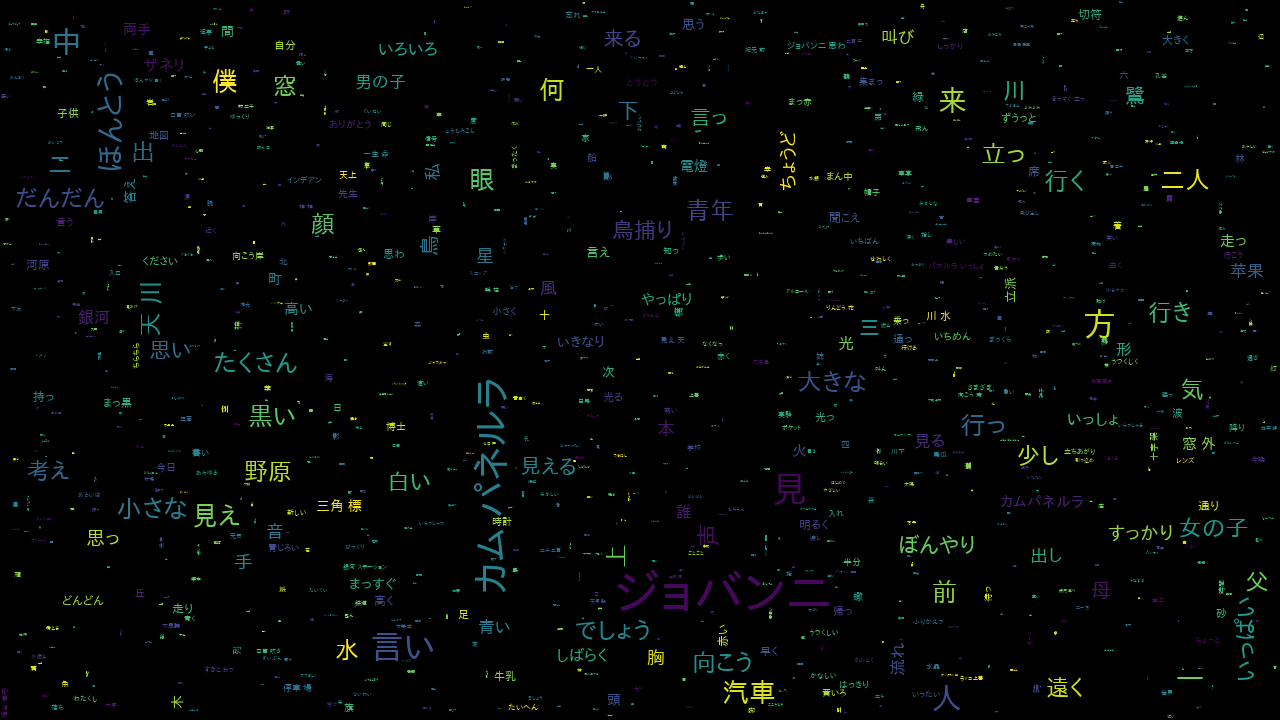

In [204]:
wc.generate(" ".join(filtered_words))
print(len(wc.layout_))
wc.to_image()

In [205]:
wc.layout_

[(('ジョバンニ', 1.0), 50, (569, 614), None, 'rgb(70, 8, 92)'),
 (('カム パネルラ', 0.5106382978723404), 38, (377, 473), 2, 'rgb(39, 128, 142)'),
 (('見', 0.4787234042553192), 37, (474, 771), None, 'rgb(69, 5, 89)'),
 (('言い', 0.39893617021276595), 34, (633, 370), None, 'rgb(58, 83, 139)'),
 (('方', 0.3829787234042553), 33, (309, 1083), None, 'rgb(208, 225, 28)'),
 (('中', 0.3351063829787234), 31, (28, 51), None, 'rgb(42, 119, 142)'),
 (('人', 0.3351063829787234), 31, (685, 931), None, 'rgb(62, 76, 138)'),
 (('一', 0.30319148936170215), 30, (677, 1175), None, 'rgb(112, 207, 87)'),
 (('ほんとう', 0.2978723404255319), 30, (70, 96), 2, 'rgb(49, 104, 142)'),
 (('来', 0.2765957446808511), 29, (87, 938), None, 'rgb(168, 219, 52)'),
 (('汽車', 0.2393617021276596), 27, (680, 722), None, 'rgb(218, 227, 25)'),
 (('何', 0.2127659574468085), 26, (77, 539), None, 'rgb(197, 224, 33)'),
 (('小さな', 0.2074468085106383), 26, (496, 116), None, 'rgb(40, 125, 142)'),
 (('僕', 0.2074468085106383), 26, (69, 212), None, 'rgb(251, 231, 

In [206]:
img = Image.new("RGB", (width, height))
draw = ImageDraw.Draw(img)
draw.font = ImageFont.truetype(font_path)
dummy_img = Image.new("RGB", (1, 1))
dummy_draw = ImageDraw.Draw(dummy_img)

In [207]:
word_datum = []
word_images = []
total_pixel = 0
for layout in wc.layout_:
    word = layout[0][0]
    size = layout[1]
    pos = layout[2][::-1]
    rotate = layout[3]
    color = layout[4]
    drawsize = draw.text
    tf = ImageFont.TransposedFont(ImageFont.truetype(font_path, size), orientation=rotate)
    word_size = dummy_draw.textsize(word, font=tf)
    image_size = (word_size[::-1 if rotate else 1])
    draw.text(pos, word, font=tf, fill=color)
    draw.rectangle((pos[0], pos[1], pos[0] + word_size[0], pos[1] + word_size[1]), outline=color)
#     print(f"{word=} {size=} {pos=} {rotate=} {color=} {word_size=}")
    word_img = Image.new("RGB", (word_size[::-1 if rotate else 1]))
    word_draw = ImageDraw.Draw(word_img)
    word_draw.text((0, 0), word, font=tf, fill=color)
    word_images.append(word_img)
    buf = io.BytesIO()
    word_img.save(buf, format="png")
    pngb64 = base64.b64encode(buf.getvalue()).decode("utf-8")
    buf.close()
    total_pixel += image_size[0] * image_size[1]
    word_datum.append({
        "word": word,
        "size": size,
        "pos": (int(pos[0]), int(pos[1])),
        "color": color,
        "word_size": word_size,
        "image_size": image_size,
        "pngb64": pngb64
    })
wc_data = {
    "width": width,
    "height": height,
    "total_pixel": total_pixel,
    "words": word_datum
}
print(f"{total_pixel=}")
with open(f"data/aozora-{id_}.js", "w", encoding="utf-8") as f:
    f.write("window.jsondata = ")
    json.dump(wc_data, f, indent=2, ensure_ascii=False)

total_pixel=154447


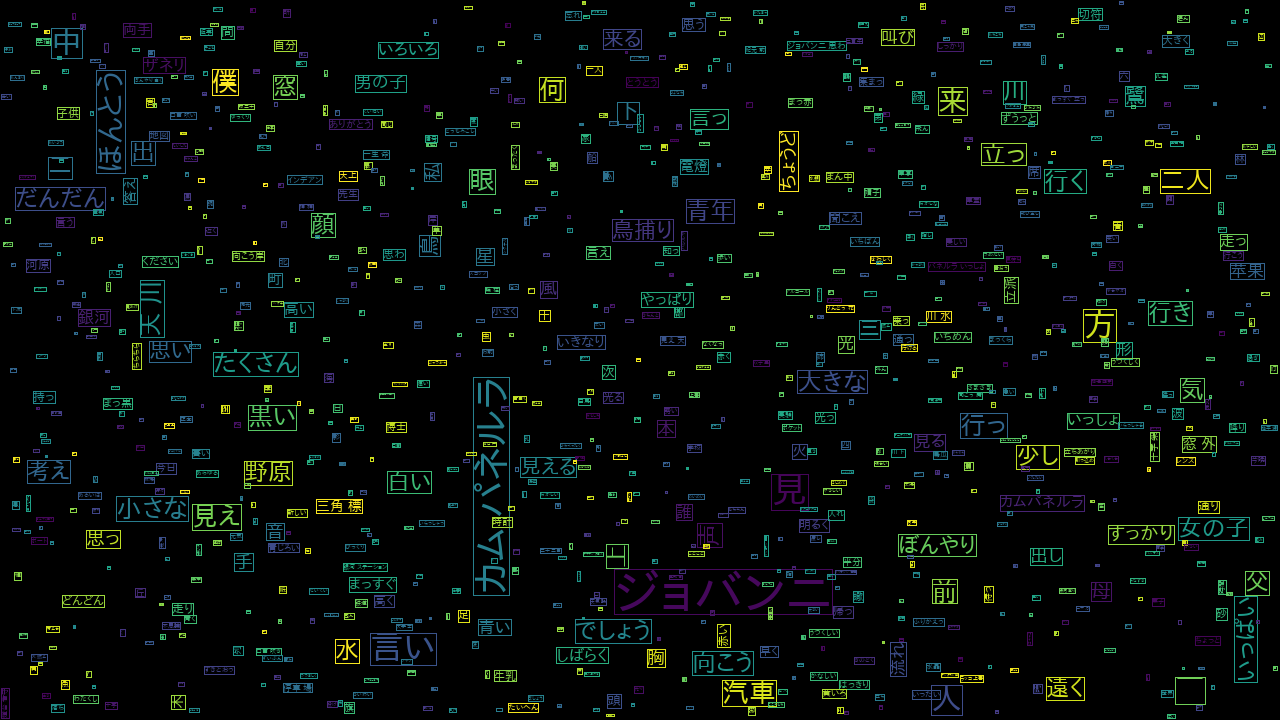

In [208]:
img

In [209]:
len(wc.layout_)

1000